In [28]:
#Léa MOVSESSIAN, Timothé COLIN CHÊ-QUANG


In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
import math

# chargement des données
fich = pkl.load( open('donnees_blablacar.pkl', 'rb'))

# {'indexcol': cols , 'data':pp2db, 'villes': villes, 'marques':marques }
titles_col = fich['indexcol']
print(len(titles_col), titles_col) 
data = fich['data']
print(data.shape)
dico_villes = fich['villes']
dico_marques = fich['marques']
print(dico_marques)

14 ['annee', 'mois', 'jour', 'heure', 'dep_ville', 'arr_ville', 'dep_coord_x', 'dep_coord_y', 'arr_coord_x', 'arr_coord_y', 'prix', 'marque', 'stars_confort', 'distance']
(6428, 14)
{'FORD': 6, 'BMW': 12, 'ISUZU': 32, 'OPEL': 1, 'LAND ROVER': 28, 'LIDER': 33, 'DS': 2, 'AUDI': 49, 'DACIA': 45, 'JAGUAR': 39, 'TOYOTA': 13, 'SUZUKI': 20, 'HUNDAI': 42, 'CITROEN': 17, 'IVECO': 8, 'RENAULT': 15, 'SKODA': 27, 'ROVER': 19, 'MITSUBISHI': 5, 'MERCEDES-BENZ': 35, 'DODGE': 29, 'ALFA ROMEO': 37, 'CHEVROLET': 26, 'LANCIA': 10, 'INFINITI': 36, 'DAEWOO': 30, 'MIETWAGEN': 38, 'VOLKSWAGEN': 3, 'LADA': 0, 'GOLF': 4, 'PORSCHE': 23, 'NISSAN': 40, 'unknown': 43, 'SSANGYONG': 34, 'FIAT': 50, 'SAAB': 14, 'CHRYSLER': 51, 'JEEP': 9, 'TESLA': 47, 'PEUGEOT': 25, 'MERCEDES BENZ': 48, 'MAZDA': 31, 'HONDA': 53, 'RANGE ROVER': 11, 'SMART': 24, 'KIA': 52, 'VOLVO': 46, 'LEXUS': 44, 'SUBARU': 18, 'SEAT': 16, 'MINI': 7, 'SUV LEXUS': 21, 'MERCEDES': 41, 'HYUNDAI': 22}


In [34]:
def analyse_rapide(d):
    
    mean = 0
    i = 0
    var = 0
    liste = []
    
    #Calcul de la moyenne
    for donnee in d:
        mean += donnee[13]
        i += 1
        liste.append(donnee[13])
    mean = mean/i 
    #On calcule la moyenne d'abord car on a besoin pour trouver le reste
    
    #Calcul variance
    for donnee in d:
        var += (donnee[13]-mean)**2
        
    var = var/i
    std = math.sqrt(var) #Calcul de l'écart-type
    liste.sort()
    
    #Calcul quantile
    j = int(i/10)
    k = 0
    quantile = []
    
    while k < i-10:
        quantile.append(liste[k])
        k+=j
        
    print("mean = "+ str(mean))
    print("std = " + str(std))
    print("quantile = " + str(quantile))
    
analyse_rapide(data)

mean = 254.74066583696327
std = 210.0702103161763
quantile = [6.0, 64.0, 88.0, 111.0, 142.0, 182.0, 230.0, 316.0, 408.0, 550.0]


bornes = [6.0, 80.93333333333334, 155.86666666666667, 230.8, 305.73333333333335, 380.6666666666667, 455.6, 530.5333333333333, 605.4666666666667, 680.4000000000001, 755.3333333333335, 830.2666666666669, 905.2000000000003, 980.1333333333337, 1055.066666666667, 1130.0000000000005, 1204.9333333333338, 1279.8666666666672, 1354.8000000000006, 1429.733333333334, 1504.6666666666674, 1579.6000000000008, 1654.5333333333342, 1729.4666666666676, 1804.400000000001, 1879.3333333333344, 1954.2666666666678, 2029.2000000000012, 2104.1333333333346, 2179.066666666668, 2254.0000000000014]
effectifs =[1131, 1665, 1065, 550, 560, 355, 387, 278, 140, 87, 85, 41, 31, 26, 8, 7, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]


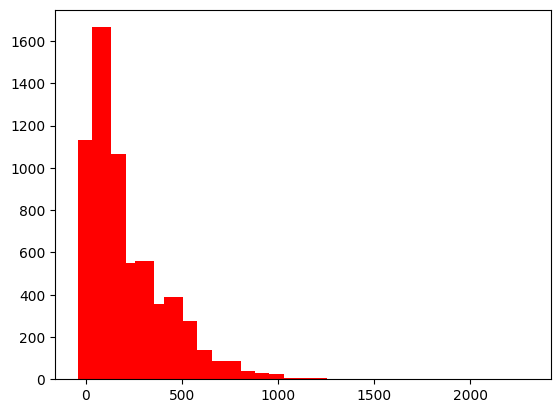

In [87]:
def discretisation_histogramme(d,n):
    maxi = 0
    mini = 500
    liste = []
    
    for donnee in d:
        liste.append(donnee[13])
        if donnee[13] > maxi:
            maxi = donnee[13]
        elif donnee[13] < mini:
            mini = donnee[13]
    bornes = []
    intervalle = (maxi-mini)/n
    
    j = mini
    for i in range(0,n+1):
        bornes.append(j)
        j += intervalle
    bornes.sort()
    print("bornes = " + str(bornes))
    
    effectifs = []
    for i in range(0,n):
        effectifs.append(np.where((liste>=bornes[i]) & (liste <= bornes[i+1]),1,0).sum())
    print("effectifs =" + str(effectifs))
    
    plt.bar(bornes, effectifs+[0], width = 100, color = 'red')
    
discretisation_histogramme(data,30)


In [ ]:
#Les bornes des intervalles discrets sont plus élevées que les quantiles car la majorité des gens se déplacent pour des distances très courtes. 
#On voit en effet que plus de la moitié des voyages sont dans les 3 premiers intervalles discrets

bornes = [0.0, 0.015625, 0.03125, 0.046875, 0.0625, 0.078125, 0.09375, 0.109375, 0.125, 0.140625, 0.15625, 0.171875, 0.1875, 0.203125, 0.21875, 0.234375, 0.25, 0.265625, 0.28125, 0.296875, 0.3125, 0.328125, 0.34375, 0.359375, 0.375, 0.390625, 0.40625, 0.421875, 0.4375, 0.453125, 0.46875, 0.484375, 0.5, 0.515625, 0.53125, 0.546875, 0.5625, 0.578125, 0.59375, 0.609375, 0.625]
effectifs =[38, 113, 1359, 4023, 920, 44, 8, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


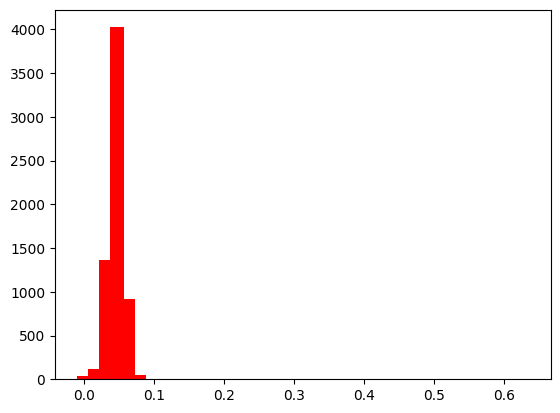

In [105]:
def discretisation_prix_au_km(d,n):
    liste = []
    maxi = 0
    mini = 500
    
    for donnee in d:
        x = donnee[10]/donnee[13]
        liste.append(x)
        if x > maxi:
            maxi = x
        elif x < mini:
            mini = x
    
    bornes = []
    intervalle = (maxi-mini)/n
    j = mini
    for i in range(0,n+1):
        bornes.append(j)
        j += intervalle
    bornes.sort()
    print("bornes = " + str(bornes))
    
    effectifs = []
    for i in range(0,n):
        effectifs.append(np.where((liste>=bornes[i]) & (liste <= bornes[i+1]),1,0).sum())
    print("effectifs =" + str(effectifs))
    
    plt.bar(bornes, effectifs+[0], width = 0.02, color = 'red')
    

discretisation_prix_au_km(data,40)

